In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv(r"F:\DATA SCIENCE\Handling missing values\train.csv")

In [3]:

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.shape

(1460, 81)

In [4]:
df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
#percentage of missing data in each column
null_columns=df.isnull().sum()/df.shape[0]*100
null_columns
remove_columns=null_columns[null_columns>20].keys()
remove_columns
#now we have removed null columns that have null values more than 20%
dropped_column_df=df.drop(columns=remove_columns)
dropped_column_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
5        6          50       RL         85.0    14115   Pave      IR1   
6        7          20       RL         75.0    10084   Pave      Reg   
7        8          60       RL          NaN    10382   Pave      IR1   
8        9          50       RM         51.0     6120   Pave      Reg   
9       10         190       RL         50.0     7420   Pave      Reg   
10      11          20       RL         70.0    11200   Pave      Reg   
11      12          60       RL         85.0    11924   Pave      IR1   
12      13          20       RL          NaN    12968   Pave      IR2   
13      14          20       RL         91.0    10652   Pave      IR1   
14      15          20       RL          NaN    10920   Pave      IR1   
15      16          45       RM         51.0     6120   Pave      Reg   
16      17          20       RL          NaN    11241   Pave      IR1   
17      18          90       RL         72.0    10791   Pave      Reg   
18      19          20       RL         66.0    13695   Pave      Reg   
19      20          20       RL         70.0     7560   Pave      Reg   
20      21          60       RL        101.0    14215   Pave      IR1   
21      22          45       RM         57.0     7449   Pave      Reg   
22      23          20       RL         75.0     9742   Pave      Reg   
23      24         120       RM         44.0     4224   Pave      Reg   
24      25          20       RL          NaN     8246   Pave      IR1   
25      26          20       RL        110.0    14230   Pave      Reg   
26      27          20       RL         60.0     7200   Pave      Reg   
27      28          20       RL         98.0    11478   Pave      Reg   
28      29          20       RL         47.0    16321   Pave      IR1   
29      30          30       RM         60.0     6324   Pave      IR1   
30      31          70  C (all)         50.0     8500   Pave      Reg   
31      32          20       RL          NaN     8544   Pave      IR1   
32      33          20       RL         85.0    11049   Pave      Reg   
33      34          20       RL         70.0    10552   Pave      IR1   
34      35         120       RL         60.0     7313   Pave      Reg   
35      36          60       RL        108.0    13418   Pave      Reg   
36      37          20       RL        112.0    10859   Pave      Reg   
37      38          20       RL         74.0     8532   Pave      Reg   
38      39          20       RL         68.0     7922   Pave      Reg   
39      40          90       RL         65.0     6040   Pave      Reg   
40      41          20       RL         84.0     8658   Pave      Reg   
41      42          20       RL        115.0    16905   Pave      Reg   
42      43          85       RL          NaN     9180   Pave      IR1   
43      44          20       RL          NaN     9200   Pave      IR1   
44      45          20       RL         70.0     7945   Pave      Reg   
45      46         120       RL         61.0     7658   Pave      Reg   
46      47          50       RL         48.0    12822   Pave      IR1   
47      48          20       FV         84.0    11096   Pave      Reg   
48      49         190       RM         33.0     4456   Pave      Reg   
49      50          20       RL         66.0     7742   Pave      Reg   
50      51          60       RL          NaN    13869   Pave      IR2   
51      52          50       RM         52.0     6240   Pave      Reg   
52      53          90       RM        110.0     8472   Grvl      IR2   
53      54          20       RL         68.0    50271   Pave      

In [9]:
dropped_column_df.shape

(1460, 76)

In [11]:
#now just accesing numerical columns
numerical_columns=dropped_column_df.select_dtypes(include=['int64','float64'])
numerical_columns.shape

(1460, 38)

In [ ]:
#checking how many var are missing in numerical columns datset
numerical_columns.isnull().sum()

In [14]:
#to get columns having null values
missing_value_variable=[]
for var in numerical_columns.columns:
    if numerical_columns[var].isnull().sum()>0:
        missing_value_variable.append(var)
missing_value_variable

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [17]:
three_columns=numerical_columns[missing_value_variable]
null_columns=three_columns[numerical_columns[missing_value_variable].isnull().any(axis=1)]
null_columns

LotFrontage  MasVnrArea  GarageYrBlt
7             NaN       240.0       1973.0
12            NaN         0.0       1962.0
14            NaN       212.0       1960.0
16            NaN       180.0       1970.0
24            NaN         0.0       1968.0
31            NaN         0.0       1966.0
39           65.0         0.0          NaN
42            NaN         0.0       1983.0
43            NaN         0.0       1977.0
48           33.0         0.0          NaN
50            NaN         0.0       1997.0
64            NaN       573.0       1998.0
66            NaN       287.0       1970.0
76            NaN         0.0       1956.0
78           72.0         0.0          NaN
84            NaN        22.0       1995.0
88          105.0         0.0          NaN
89           60.0         0.0          NaN
95            NaN        68.0       1993.0
99           77.0         0.0          NaN
100           NaN        28.0       1977.0
104           NaN       600.0       1951.0
108          85.0         0.0          NaN
111           NaN         0.0       2000.0
113           NaN       184.0       1953.0
116           NaN       116.0       1962.0
120           NaN         0.0       1969.0
125          60.0         0.0          NaN
126           NaN         0.0       1977.0
127          55.0         0.0          NaN
131           NaN        40.0       2000.0
133           NaN       136.0       2001.0
136           NaN       196.0       1967.0
140          70.0         0.0          NaN
147           NaN       180.0       2001.0
148          63.0       120.0          NaN
149           NaN         0.0       1936.0
152           NaN       252.0       1971.0
153           NaN         0.0       1960.0
155          60.0         0.0          NaN
160           NaN         0.0       1984.0
163          55.0         0.0          NaN
165          62.0         0.0          NaN
166           NaN         0.0       1955.0
169           NaN       653.0       1981.0
170           NaN         0.0       1991.0
177           NaN         0.0       1958.0
180           NaN       456.0       2000.0
186           NaN         0.0       1990.0
191           NaN       138.0       1972.0
198          92.0         0.0          NaN
203           NaN       205.0       2004.0
207           NaN         0.0       1960.0
208           NaN       128.0       1988.0
210          67.0         0.0          NaN
214           NaN       153.0       1977.0
218           NaN       312.0       1939.0
221           NaN         0.0       2002.0
234           NaN         NaN       2002.0
237           NaN         0.0       1993.0
241          40.0         0.0          NaN
244           NaN         0.0       1994.0
249           NaN       472.0       1958.0
250          55.0         0.0          NaN
269           NaN       174.0       1987.0
287           NaN         0.0          NaN
288           NaN        31.0       1970.0
291          55.0         0.0          NaN
293           NaN        34.0       1977.0
307           NaN         0.0          NaN
308           NaN         0.0       1961.0
310           NaN       112.0       1993.0
319           NaN       225.0       1980.0
328           NaN         0.0       1930.0
330           NaN        84.0       2002.0
335           NaN         0.0       1965.0
342           NaN       340.0       1949.0
346           NaN         0.0       1960.0
347           NaN        30.0       1960.0
351           NaN         0.0       1986.0
356           NaN       106.0       1992.0
360           NaN         0.0       1978.0
361           NaN         0.0       1940.0
364           NaN       120.0       1976.0
366           NaN       247.0       1963.0
369           NaN         0.0       1997.0
370           NaN         0.0       2000.0
375           NaN         0.0          NaN
384           NaN         0.0       1992.0
386          58.0         0.0          NaN
392           NaN         0.0       1959.0
393           NaN         0.0          NaN
404    

In [18]:
df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [27]:
#now we will find all those values havng "LOT CONFIG" value "Inside"
insidedf=df[df.loc[:'LotConfig']=="Inside"]

In [28]:
#now getting all values of "Lot Frontage" which are in same row as "inside"
inside_lotfrontage=df[df.loc[:,'LotConfig'] == "Inside"]["LotFrontage"]

In [30]:
#mean of this inside_lotfrontage columns
mean=inside_lotfrontage.mean()

In [31]:
#now we will replace all null values of LOT FRONTAGE COLUMN related to "Inside" with this mean
inside_lotfrontage.replace(np.nan,mean)

0        65.000000
2        68.000000
5        85.000000
6        75.000000
8        51.000000
10       70.000000
11       85.000000
12       67.715686
13       91.000000
17       72.000000
18       66.000000
19       70.000000
21       57.000000
22       75.000000
23       44.000000
24       67.715686
27       98.000000
29       60.000000
30       50.000000
33       70.000000
34       60.000000
35      108.000000
37       74.000000
38       68.000000
39       65.000000
40       84.000000
41      115.000000
44       70.000000
45       61.000000
47       84.000000
48       33.000000
49       66.000000
51       52.000000
53       68.000000
54       60.000000
55      100.000000
56       24.000000
59       60.000000
60       63.000000
61       60.000000
62       44.000000
63       50.000000
64       67.715686
65       76.000000
66       67.715686
67       72.000000
70       95.000000
73       85.000000
75       21.000000
76       67.715686
77       50.000000
78       72.000000
82       78.

In [36]:
df_copy=df.copy()

#lotconfigunique=['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
for var in df['LotConfig'].unique():
#update will replace null values
    insidedf=df[df.loc[:'LotConfig']==var]
    var_lotfrontage=df[df.loc[:,'LotConfig'] == var]["LotFrontage"]
    mean=var_lotfrontage.mean()
    df_copy.update(var_lotfrontage.replace(np.nan,mean))
df_copy.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Explanation of Next Step
### using mean
-as in cell cell no 14 we calculated columns having null values 

-which give us these columns

-['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

-as in above last few steps we find relative name with 'LotFrontage' which was 'LotConfig'

-and then with unique values in "LotConfig column" we calculated "MEAN" in conyrast with "LotFrontage" column

-and fill "Null Values" in "Lot Fronrafe" column

-- null_value_column=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

-now as we observe these null_value_column and find it related Categircal column 

-then related categorical column list will be 

-related_categorical_column=['LotConfig','MasVnrType','GarageType']

-now we will repeat above process for MasVnrTypeand Garage Type on original datset

-but we will not do it in seperate cell 

-we will do it with the help of for loop



In [55]:
df_cpy = df.copy()
num_vars_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars = ['LotConfig','MasVnrType','GarageType']
for variables,categories in zip(num_vars_miss,cat_vars):
    for var in df[categories ].unique():
    #update will replace null values  
        var_=df[df.loc[:,categories] == var][variables]
        mean=var_.mean()
        df_cpy.update(var_.replace(np.nan,mean))
df_cpy[num_vars_miss].isnull().sum()


LotFrontage     0
MasVnrArea      8
GarageYrBlt    81
dtype: int64

- Q1 : still "MasVnArea" Show 8 null values why ?
    
- A1 :  because there are null values in its related column which "MasVnrType"

- Q2 : still "GarageYrBlt" Show 81 null values why ?

- A2 :  because there are null values in its related column which "GarageType"

- From above two questions and there answers we observe that

-if we fill numerical null values column from categorical columns then categorical column must not have null values 

##### now we will use categorical column having  no null values for sake of understanding and it will show that 
##### if we choose categorical column with no null values to remove null values from numerical column 
###### then there will be no null values in numerical column
## Example given below


In [56]:
df_cpy = df.copy()
num_vars_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars = ['LotConfig','Exterior2nd','KitchenQual']
for variables,categories in zip(num_vars_miss,cat_vars):
    for var in df[categories ].unique():
    #update will replace null values  
        var_=df[df.loc[:,categories] == var][variables]
        mean=var_.mean()
        df_cpy.update(var_.replace(np.nan,mean))
df_cpy[num_vars_miss].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### proved !! no null values !!

# 2 Data Distribution

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

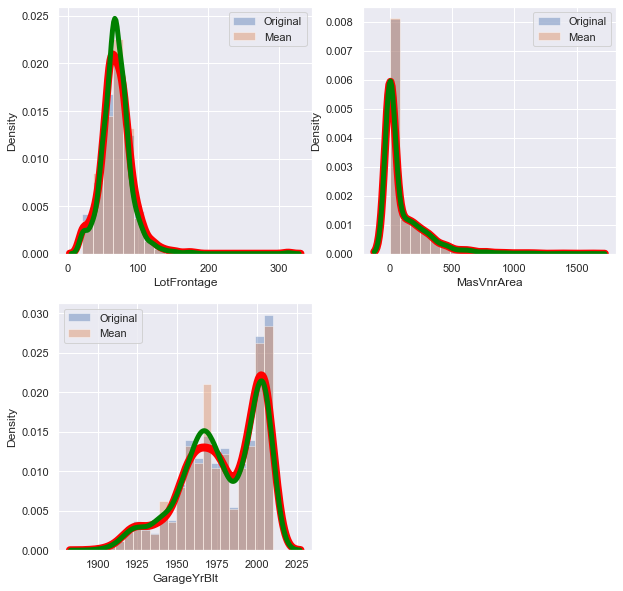

In [62]:

plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(num_vars_miss):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
    sns.distplot(df_cpy[var], bins=20, kde_kws={'linewidth':5, 'color':'green'},label="Mean",)
    plt.legend()

### Using Median

In [63]:
df_cpy_median = df.copy()
num_vars_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars = ['LotConfig','Exterior2nd','KitchenQual']
for variables,categories in zip(num_vars_miss,cat_vars):
    for var in df[categories ].unique():
    #update will replace null values  
        var_=df[df.loc[:,categories] == var][variables]
        median=var_.median()
        df_cpy_median.update(var_.replace(np.nan,median))
df_cpy_median[num_vars_miss].isnull().sum()


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

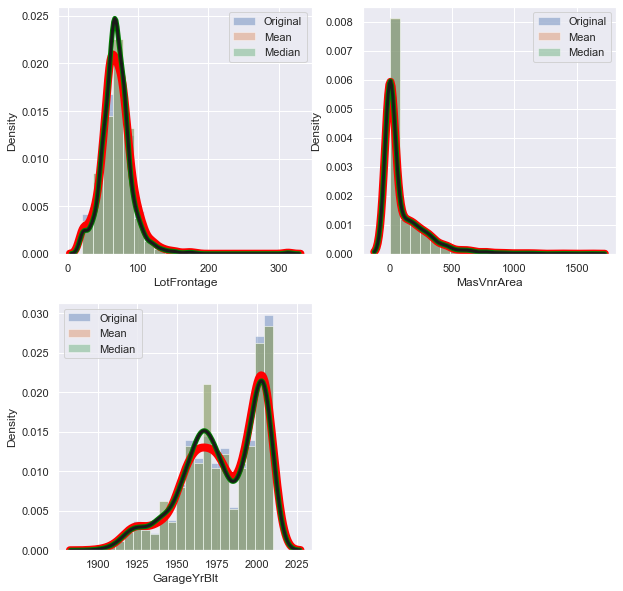

In [64]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(num_vars_miss):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original")
    sns.distplot(df_cpy[var], bins=20, kde_kws={'linewidth':5, 'color':'green'},label="Mean")
    sns.distplot(df_cpy_median[var], bins=20, kde_kws={'linewidth':3, 'color':'k'},label="Median")
    plt.legend()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'df_copy_median' is not defined

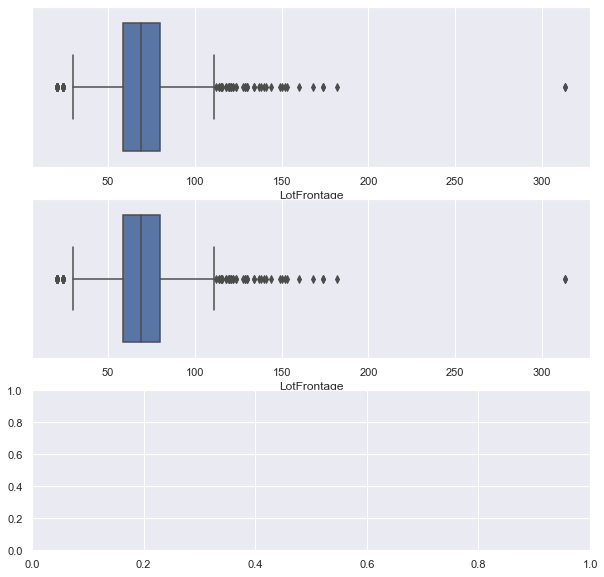

In [65]:
for i, var in enumerate(num_vars_miss):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,1,2)
    sns.boxplot(df_copy[var])
    plt.subplot(3,1,3)
    sns.boxplot(df_copy_median[var])